In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 

In [2]:
from pycaret.classification import *

In [3]:
model = load_model('dt')

Transformation Pipeline and Model Successfully Loaded


In [4]:
scan_1 = pd.read_csv("nap-scan.csv")
scan_2 = pd.read_csv("nap-scan-2.csv")
cols = ["ApId",
"NApMacAddress",
"LastCheckinTime",
"LastStatusId",         
"SSID",                 
"TSF",                  
"Frequency",            
"Rssi",                  
"PrimaryChannel",       
"SecondaryChannel",     
"ChannelWidth",         
"StaChannelWidth",      
"FirstCenterFrequency", 
"SecondCenterFrequency",
"Authentication",       
"Security"]
scan_1.columns = cols
# checking the column 
print(scan_2[r'\N'].value_counts(), len(scan_2[r'\N']))
# seems like the \N col is having only newline values dropping it 
scan_2 = scan_2.drop(r"\N", axis = 1 ) 
scan_2.columns = cols
total_scan = scan_1.append(scan_2, ignore_index=True)

\N    5259
Name: \N, dtype: int64 5259


In [5]:
preds = model.predict(total_scan)

In [6]:

preds

array([ 11,  10,   2, ...,  52, 127,   6])

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
accuracy_score(total_scan['Frequency'].to_numpy(), preds )

0.8919877478639368

In [9]:
total_scan['Preds'] = preds

In [10]:
total_scan

,ApId,NApMacAddress,LastCheckinTime,LastStatusId,SSID,TSF,Frequency,Rssi,PrimaryChannel,SecondaryChannel,ChannelWidth,StaChannelWidth,FirstCenterFrequency,SecondCenterFrequency,Authentication,Security,Preds
0,297,EA:48:B8:C2:6F:BC,2022-04-05 04:46:18,1275036,x20Free_Wi-Fi,3806851836,11,-59,11,0,NaN,20,NaN,NaN,NaN,NaN,11
1,320,04:95:E6:9E:80:78,2022-04-07 10:12:19,1298899,L.S.C,43136848531,10,-72,10,0,NaN,20,NaN,NaN,PSK,CCMP,10
2,320,04:95:E6:A6:50:90,2022-04-07 10:12:19,1298899,Singla,45709517200,2,-83,2,0,NaN,any,NaN,NaN,PSK,CCMP,2
3,320,32:84:2F:EB:A5:40,2022-04-07 10:12:19,1298899,Redmi 9A,1276727306001,11,-85,11,0,0.0,20,0.0,0.0,PSK,CCMP,11
4,320,34:CE:00:23:5D:00,2022-04-07 10:12:19,1298899,Xiaomi_5CFF,12711629212,1,-84,1,0,NaN,20,NaN,NaN,PSK,TKIP CCMP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6198,2187,72:6D:EC:0A:4C:23,2022-04-11 11:39:33,15711825,NaN,369069911408,153,-55,127,0,0.0,20,153.0,0.0,PSK,CCMP TKIP,127
6199,2187,72:6D:EC:0A:83:33,2022-04-11 11:39:33,15711825,INDIO-cast-failover,525933864222,149,-51,127,0,1.0,any,155.0,0.0,PSK,CCMP TKIP,127
6200,2187,72:6D:EC:0A:8A:17,2022-04-11 11:39:33,15711825,INDIO-cast-failover,5466269661876,52,-49,52,0,1.0,any,58.0,0.0,PSK,CCMP TKIP,52
6201,2187,76:6D:EC:0A:4C:23,2022-04-11 11:39:33,15711825,NaN,369069945541,153,-55,127,0,0.0,20,153.0,0.0,PSK,CCMP TKIP,127


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


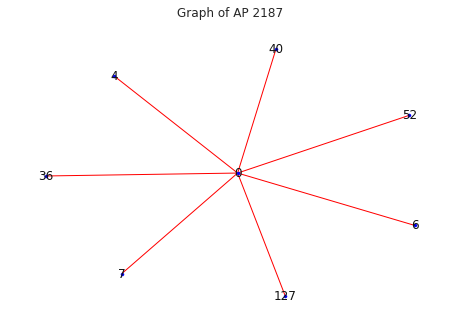

In [12]:
from net_vis import * 
draw_graph(2187,total_scan, "Preds")

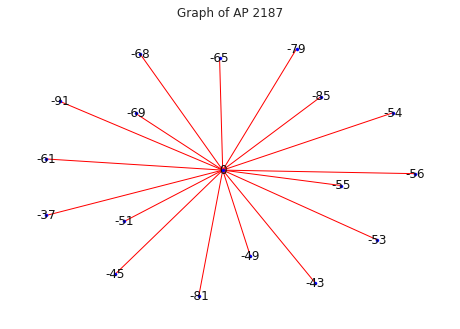

In [13]:
draw_graph(2187,total_scan, )